# Metric Comparisons

Compares:
- DeepSEA
- Epitome

Creates 4 heatmaps comparing AUC and PR results for DeepSEA and Epitome.

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams

In [2]:
epitome_output = '/home/eecs/akmorrow/epitome/out/Epitome'

deepSEA_output = '/home/eecs/akmorrow/epitome/out/DeepSEA'

plot_output = '/home/eecs/akmorrow/epitome/out/figures'

In [3]:
## Functions

def saveHeatmap(df, output_filepath, annot=False, cmap = 'coolwarm'):

    sns.heatmap(df, annot=annot, cmap = cmap)
    
    plt.savefig(output_filepath, bbox_inches = "tight")
    
def intersection(lst1, lst2): 
  
    # Use of hybrid method 
    temp = set(lst2) 
    lst3 = [value for value in lst1 if value in temp] 
    return lst3 
     

## AUC Comparisons

In [11]:
# only use cell types that epitome saw
cell_types = ['T-47D',
 'SK-N-SH_RA',
 'PANC-1',
 'NB4',
 'MCF-7',
 'K562',
 'HepG2',
 'HeLa-S3',
 'HUVEC',
 'HCT-116',
 'H1-hESC',
 'GM12892',
 'GM12891',
 'GM12878',
 'A549']

In [4]:
deepsea_av_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_AUC.csv"), sep="\t")

deepsea_auc = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AUC.csv"), sep="\t")

epitome_auc = pd.read_csv(os.path.join(epitome_output, "Epitome_AUC.csv"), sep="\t")

epitome_auc.set_index('CellType', inplace=True)
deepsea_auc.set_index('CellType', inplace=True)
deepsea_av_auc.set_index('CellType', inplace=True)

In [28]:
# filter out cell types seen
deepsea_auc = deepsea_auc.loc[deepsea_auc.index.isin(cell_types)]
epitome_auc = epitome_auc.loc[epitome_auc.index.isin(cell_types)]
deepsea_av_auc = deepsea_av_auc.loc[deepsea_av_auc.index.isin(cell_types)]

In [5]:
# ### Heatmaps

# c1 = list(deepsea_auc.columns)

# c1.remove('Unnamed: 0')
# c1.remove('DNase')
# c1.remove('AUC_Average_Macro')
# c1.remove('AUC_Average_Micro')


# c2 = list(epitome_auc.columns)

# c2.remove('Unnamed: 0')
# c2.remove('AUC_Average_Macro')
# c2.remove('AUC_Average_Micro')

# def intersection(lst1, lst2): 
  
#     # Use of hybrid method 
#     temp = set(lst2) 
#     lst3 = [value for value in lst1 if value in temp] 
#     return lst3 
     
# c_auc = intersection(c1,c2)



## PR Comparisons

In [9]:
deepsea_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_PR.csv"), sep="\t")

deepsea_av_pr = pd.read_csv(os.path.join(deepSEA_output, "DeepSEA_AVERAGE_PR.csv"), sep="\t")

epitome_pr = pd.read_csv(os.path.join(epitome_output, "Epitome_PR.csv"), sep="\t")

epitome_pr.set_index('CellType', inplace=True)
deepsea_pr.set_index('CellType', inplace=True)
deepsea_av_pr.set_index('CellType', inplace=True)

In [25]:
# filter out cell types seen
deepsea_pr = deepsea_pr.loc[deepsea_pr.index.isin(cell_types)]
epitome_pr = epitome_pr.loc[epitome_pr.index.isin(cell_types)]
deepsea_av_pr = deepsea_av_pr.loc[deepsea_av_pr.index.isin(cell_types)]


## Make heatmap

In [34]:

c1 = list(deepsea_pr.columns)

c1.remove('Unnamed: 0')
c1.remove('DNase')
c1.remove('PR_Average')


c2 = list(epitome_pr.columns)

c2.remove('Unnamed: 0')
c2.remove('PR_Average')


c_pr = intersection(c1,c2)



# Violin plot for PR values

In [29]:

df = pd.DataFrame({"DeepSEA_PR": deepsea_pr['PR_Average'],"Epitome_PR": epitome_pr['PR_Average'],
                  "DeepSEA_ROC": deepsea_auc['AUC_Average_Macro'],"Epitome_ROC": epitome_auc['AUC_Average_Macro']})
min(df["Epitome_PR"])

0.38447027296511455

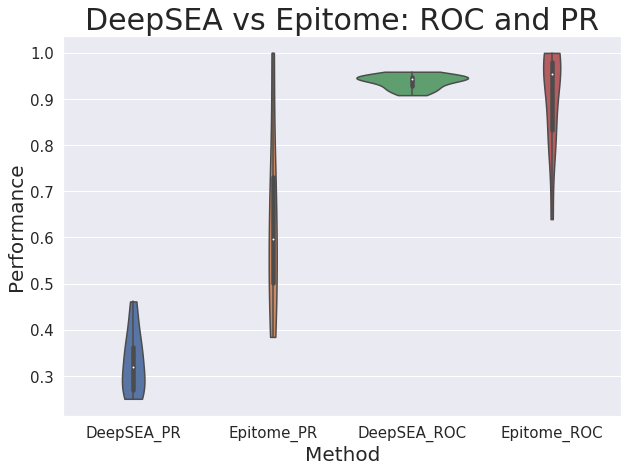

In [38]:

df = pd.DataFrame({"DeepSEA_PR": deepsea_pr['PR_Average'],"Epitome_PR": epitome_pr['PR_Average'],
                  "DeepSEA_ROC": deepsea_auc['AUC_Average_Macro'],"Epitome_ROC": epitome_auc['AUC_Average_Macro']})
df
melted = pd.melt(df, value_vars=["DeepSEA_PR","Epitome_PR","DeepSEA_ROC","Epitome_ROC"])
ax = sns.violinplot(x="variable", y="value", data=melted, cut = 0)

ax.axes.set_title("DeepSEA vs Epitome: ROC and PR",fontsize=30)
ax.set_xlabel("Method",fontsize=20)
ax.set_ylabel("Performance",fontsize=20)
ax.tick_params(labelsize=15)
# sns.plt.show()

# Low AUCs for SK-NA cell type for CTCF

# Save meaned metrics to file

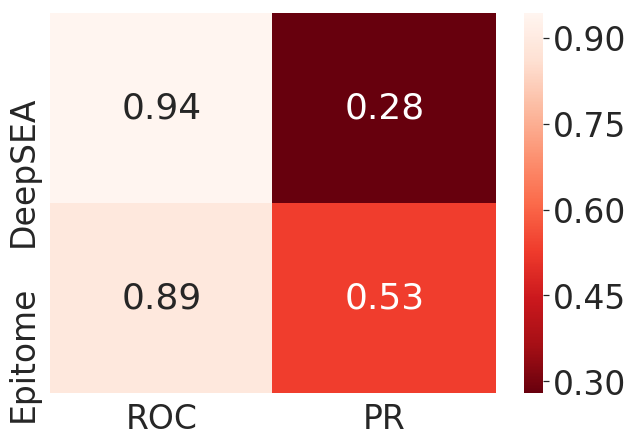

In [35]:
rcParams['figure.figsize'] = 10,7
a = np.nanmean(deepsea_auc[c_auc])
b = np.nanmean(deepsea_pr[c_pr])

c = np.nanmean(epitome_auc[c_auc])
d = np.nanmean(epitome_pr[c_pr])

arr = np.array([[a,b],[c,d]])

df = pd.DataFrame(arr, index=['DeepSEA', 'Epitome'], columns=['ROC', 'PR'])
sns.set(font_scale=3)  
saveHeatmap(df, 
           os.path.join(plot_output, 'PR_confusion_heatmap.pdf'), annot=True, cmap = "Reds_r")